<a href="https://colab.research.google.com/github/sury1999/Data-Analysis-Excercises/blob/main/Page_time_series_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**FreeCodeCamp Project #4**
##**Page Time Series Visualizer**

###**Assignment**
For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

####**Use the data to complete the following tasks:**
*  Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
*  Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
*  Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to figure 1. The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
*  Create a draw_bar_plot function that draws a bar chart similar to figure 2. It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
*  Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to figure 3. These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

###**Figure 1**
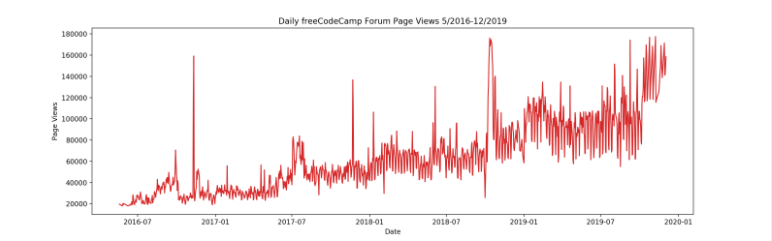

###**Figure 2**
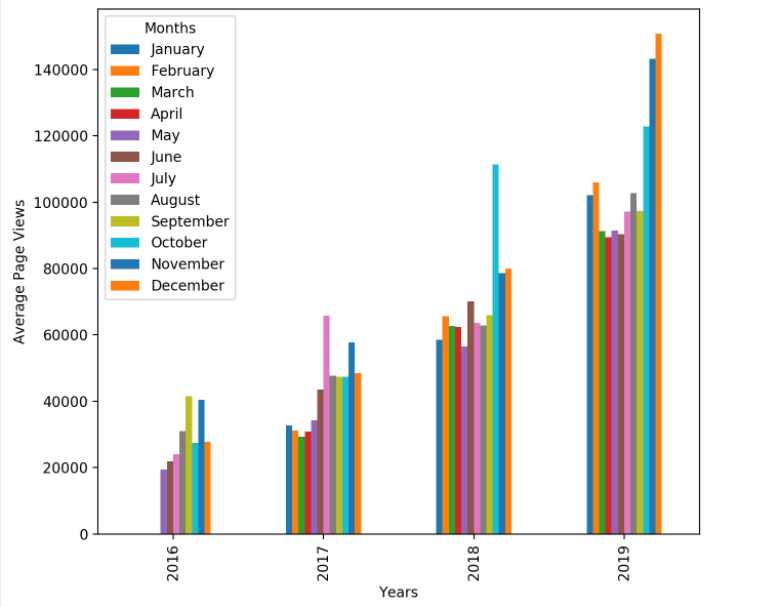

###**Figure 3**
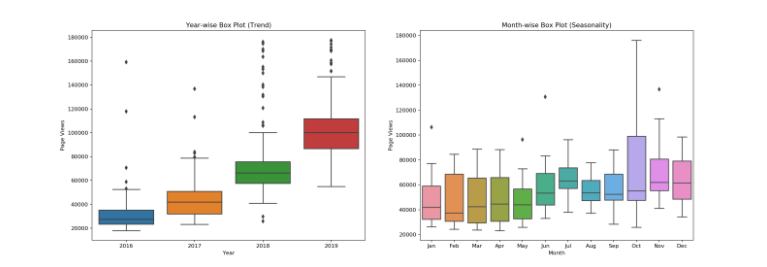

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.dates import DateFormatter


In [9]:
df = pd.read_csv('/fcc-fourm-pageview.csv',
                  parse_dates=['date'],
                 index_col= ['date'],
                 na_values=['999.99'])
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [10]:
df_clean = df[(df['value'] >= df['value'].quantile(0.025)) &
              (df['value'] <= df['value'].quantile(0.975)) ]
df_clean.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [11]:
df_dates_reqd = df_clean['5/2016':'12/2019']
df_dates_reqd.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


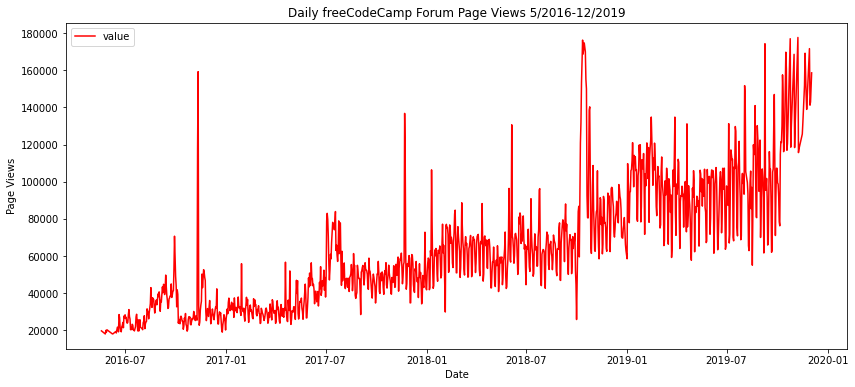

In [12]:
fig, ax = plt.subplots(figsize=(14,6))
ax.set(xlabel="Date",
       ylabel="Page Views",
       title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
sns.lineplot(data=df_dates_reqd,  palette=['red'])

In [13]:
df_clean["month"] = df_clean.index.month
df_clean["year"] = df_clean.index.year
df_clean.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016


In [14]:
df_bardata = df_clean.groupby(['year', 'month'])['value'].mean()
df_bardata.head()


year  month
2016  5        19432.400000
      6        21875.105263
      7        24109.678571
      8        31049.193548
      9        41476.866667
Name: value, dtype: float64

In [17]:
df_plot = df_bardata.unstack()
df_plot

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


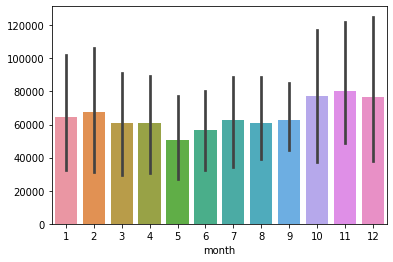

In [25]:
sns.barplot(data=df_plot)